## Predict IMDB rating of a movie
Predict IMDB rating of a movie_fullFeatures-XGBbase: a write up summary of this project and most data preparation and EDA are in this notebook. There are other notebooks in this repo that contain other types of models.

Data Source: 
https://github.com/sundeepblue/movie_rating_prediction/movie_metadata.csv


## Table of Contents

* <a href="#Project Summary">Project Summary</a>

* <a href="#Data Preparation and Preprocessing">Data Preparation and Preprocessing</a>

* <a href="#Exploratory data analysis (EDA)">Exploratory data analysis (EDA)</a>

* <a href="#Feature Engineering">Feature Engineering</a>
 
* <a href="#More EDA after Feature Engineering">More EDA after Feature Engineering</a>

* <a href="#More Feature Engineering">More Feature Engineering</a>

* <a href="#XGBoost Baseline Model">XGBoost Baseline Model</a>

<a id="Project Summary"></a>
## Project Summary

 ## Feature Engineering

Majority attributes are numerical. For these features we can change the type form float64 to float16 or int16 to save memory use. However, since our data set is not particularly large in size and the training time is acceptable. I skipped this step.

For text column without too many levels such as color， country，language，and content_rating, I used one hot encoding.
 
### NLP transformed features
Instead of simply dropping the text data columns like genres plot_keywords and movie_title, I used on hot encoding for genres and NLP treatments to the other two. Since plot_keywords has not contextual information, I used TFIDF which is a  a feature based on term freq and document freq to vectorize the text and PCA to reduce the dimension. The train, validation and test data all went through the same processing. For movie_title, because the words in the title are usually contextual and can be considered as a short sentence, I used universal sentence encoder which is a Transformer language model to vectorize the text.

For the columns of director_name and actor names I used label encoding and used these features in LGB as categorical features. While in XGB model I removed these features since XGB need to take one hot encoded features. For future predctions: unknown actors or directors in new test data just label as unknown.

The code for achieve all the above treatments can be found in the feature engineering section of this notebook.

In summary, the following feature engineering were performed on text features:

  -- one hot encoding features for genres
 

 -- label encoding for people's name features

 -- Create plot_keywords Features (TFIDF and then PCA)

 -- movie_title Features (USE)

-----------------------
## Train, test split

Data after preprocessing and feature engineering is saved in a csv file called.

In order to split the data into Train, validation and test sets, I used 
np.random.choice function to randomly choose 360 data points and reserve as test.

The code is in notebook "LightGBMbase".



## Results

#### There are four types of models I built - XGB, LGB, MLP, MLR. Please see other notebooks in this repo for code and details.
#### To make sure the models are comparable, all models are built on the same train and test datasets.
####  best model of each type - RMSE on test dataset

| Model Name  |    Root Mean Squared Error      | 
|-------------|---------------|
| XGB         |      0.7566          |  
| LGB         |   0.7354    |  
| MLP |            1.1672   |
| Multiple Linear Regression |  0.8925  |   

Table. Model RMSE Comparsion and Evaluation


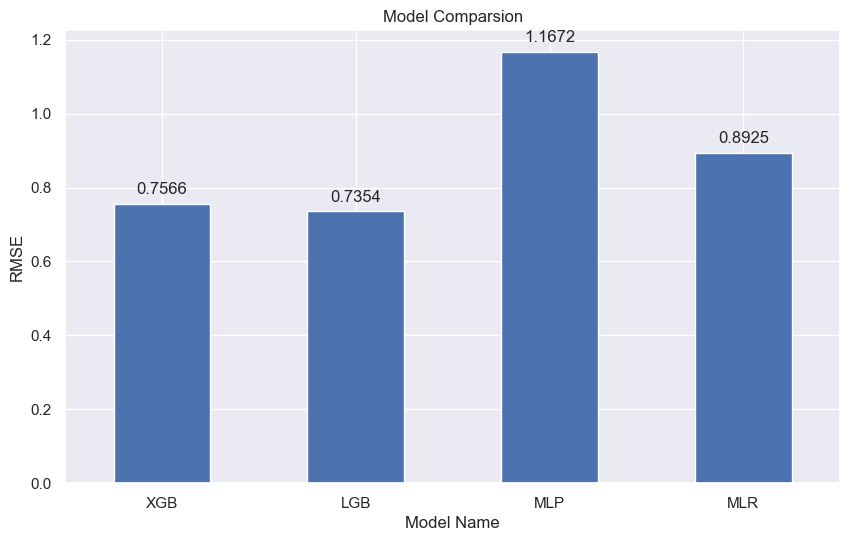

In [7]:
#formatting for plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['font.sans-serif'] = "Arial"

ModelRMSEs = [0.7566, 0.7354, 1.1672, 0.8925]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(ModelRMSEs)

x_labels = ["XGB","LGB","MLP","MLR"]

# Plot the figure.
plt.figure(figsize=(10, 6))
ax = freq_series.plot(kind='bar')
ax.set_title('Model Comparsion')
ax.set_xlabel('Model Name')
plt.xticks(rotation=0) #try to rotate x labels
ax.set_ylabel('RMSE')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.4f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

----------------------
## Model Comparison 
To make sure the models are comparable, all models are built on the same train and test datasets. 

#### From the Model Comparsion plot above, we can see LGB outperformed all other models on test RMSE. XGB performance is close to LGB with 2% larger error. MLR has 18% larger error than XGB. MLP has the largest RMSE. MLP errors could be extremely too large if neuro-architectures and parameters are not well configed.


In terms of model interpretability, MLR can print out coefficents so it is of good interpretability.
XGB and LGB have better interpretability since they have tree plots and feature importance plots generated.


On the other hand, MLP is a blackbox and lack of interpretability.  



---------
### Training Time for each model

Another aspect of model performance is the efficency. Here is a summary of the approximate trainging time for models.

| Model Name  |    Time      | 
|-------------|---------------|
| XGB         |      30s          |  
| LGB         |   10s    |  
| MLP |            3 min  |
| Multiple Linear Regression |  2.46 ms  |   

Table. Model Training Time Comparsion and Evaluation


MLP is slow due to not using GPU to increase training efficency.





----------------------
## Discussion

In XGB and LGB feature importance plots, several features from plot_keywords TFIDF is actually important.
Surprisingly, in XGB model, plot_keywords feature PC5 is as important as actor_1_facebook_likes. However, NLP number features such as plot_keywords Features (TFIDF and then PCA) and movie_title Features (USE) are lack of interpretability. 

None of the plot_keywords feature are picked in top 50 list for LGB model though.


Another important feature both models have in common is Drama. In the EDA section of this notebook, we can see over 1750 films were labeled as Drama. That is a large portion of the entire dataset.


most important feature: num_voted_users -confirmed by how the score calculated as in the link below:
https://www.quora.com/How-is-a-film-or-shows-IMDb-score-determined
-----------------------
## Future Work



Random Forest 
recursive feature elimination (RFE)

XGB visualize feature interactions

 


<a id="Data Preparation and Preprocessing"></a>
## Data Preparation and Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
import re
import matplotlib.pyplot as plt
import statistics

In [5]:
directory = 'C:/Users/N1110/Desktop/Python_Github_Challenge/'
df_raw= pd.read_csv('movie_metadata2.csv')  #replaced all Â  in the end of title; add id column before import; remove |

In [6]:
df_raw.shape

(5043, 29)

In [8]:
df_raw.head(5)

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [83]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5043 non-null   int64  
 1   color                      5024 non-null   object 
 2   director_name              4939 non-null   object 
 3   num_critic_for_reviews     4993 non-null   float64
 4   duration                   5028 non-null   float64
 5   director_facebook_likes    4939 non-null   float64
 6   actor_3_facebook_likes     5020 non-null   float64
 7   actor_2_name               5030 non-null   object 
 8   actor_1_facebook_likes     5036 non-null   float64
 9   gross                      4159 non-null   float64
 10  genres                     5043 non-null   object 
 11  actor_1_name               5036 non-null   object 
 12  movie_title                5043 non-null   object 
 13  num_voted_users            5043 non-null   int64

In [84]:
df_raw["genres"]

0       Action Adventure Fantasy Sci-Fi
1              Action Adventure Fantasy
2             Action Adventure Thriller
3                       Action Thriller
4                           Documentary
                     ...               
5038                       Comedy Drama
5039       Crime Drama Mystery Thriller
5040              Drama Horror Thriller
5041               Comedy Drama Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [9]:
df_raw.drop(columns=['movie_imdb_link'], inplace=True) #drop non-informative column

In [86]:
df_raw.shape

(5043, 28)

In [10]:
# check missing values
df_raw_NullCols = df_raw.isnull().sum()
df_raw_NullCols = df_raw_NullCols[df_raw_NullCols > 0]

df_raw_NullCols = pd.DataFrame({'n Missing' : df_raw_NullCols,
                                  '% Missing' : ((df_raw_NullCols / df_raw.shape[0])*100).round(2)})


df_raw_NullCols = df_raw_NullCols.sort_values('n Missing')

cm = sns.light_palette("red", as_cmap=True)
df_raw_NullCols.style.background_gradient(cmap=cm)

,n Missing,% Missing
country,5,0.100000
actor_1_facebook_likes,7,0.140000
actor_1_name,7,0.140000
language,12,0.240000
facenumber_in_poster,13,0.260000
actor_2_name,13,0.260000
actor_2_facebook_likes,13,0.260000
duration,15,0.300000
color,19,0.380000
num_user_for_reviews,21,0.420000


In [88]:
# heavily mssing, but might be ok to dropna- check data sample size after dropna
#gross                        884
#budget                       492

#content_rating               303 - obj, create unknown level


# aspect_ratio - highly related to target or not?

# movie title cotain info   movie_title 

#plot_keywords ?


## I THINK THE KEY OF THIS PROJECT IS - how to deal with plot_keywords ??
## rm 特殊符号 然后 VECTORIZE 
#总共多少种类 然后categorical variable


# genres
# move title

In [11]:
df_raw.dropna(inplace = True)
df_raw.shape #(3756, 28) # after drop na, still have enough for modeling

(3756, 28)

In [90]:
df_raw.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,2139.449414,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,1345.761978,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,989.750000,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,2033.500000,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,3163.250000,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,5042.000000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [91]:
(5043-3756)/5043 #0.2552052349791791 25% dropped

0.2552052349791791

In [92]:
df_raw.isnull().sum()

id                           0
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

<a id="Exploratory data analysis (EDA)"></a>
## Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Histogram of IMDB scores(0~10)')

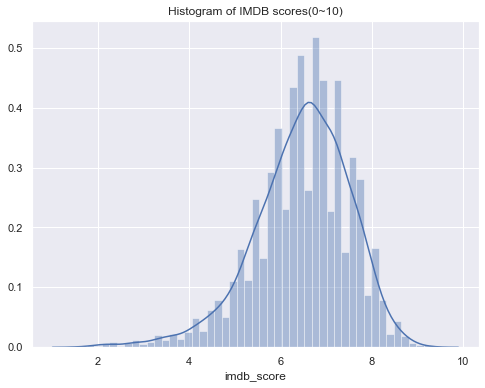

In [93]:
sns.set(rc={"figure.figsize": (8, 6)});
sns.distplot(df_raw['imdb_score'])
plt.title('Histogram of IMDB scores(0~10)')

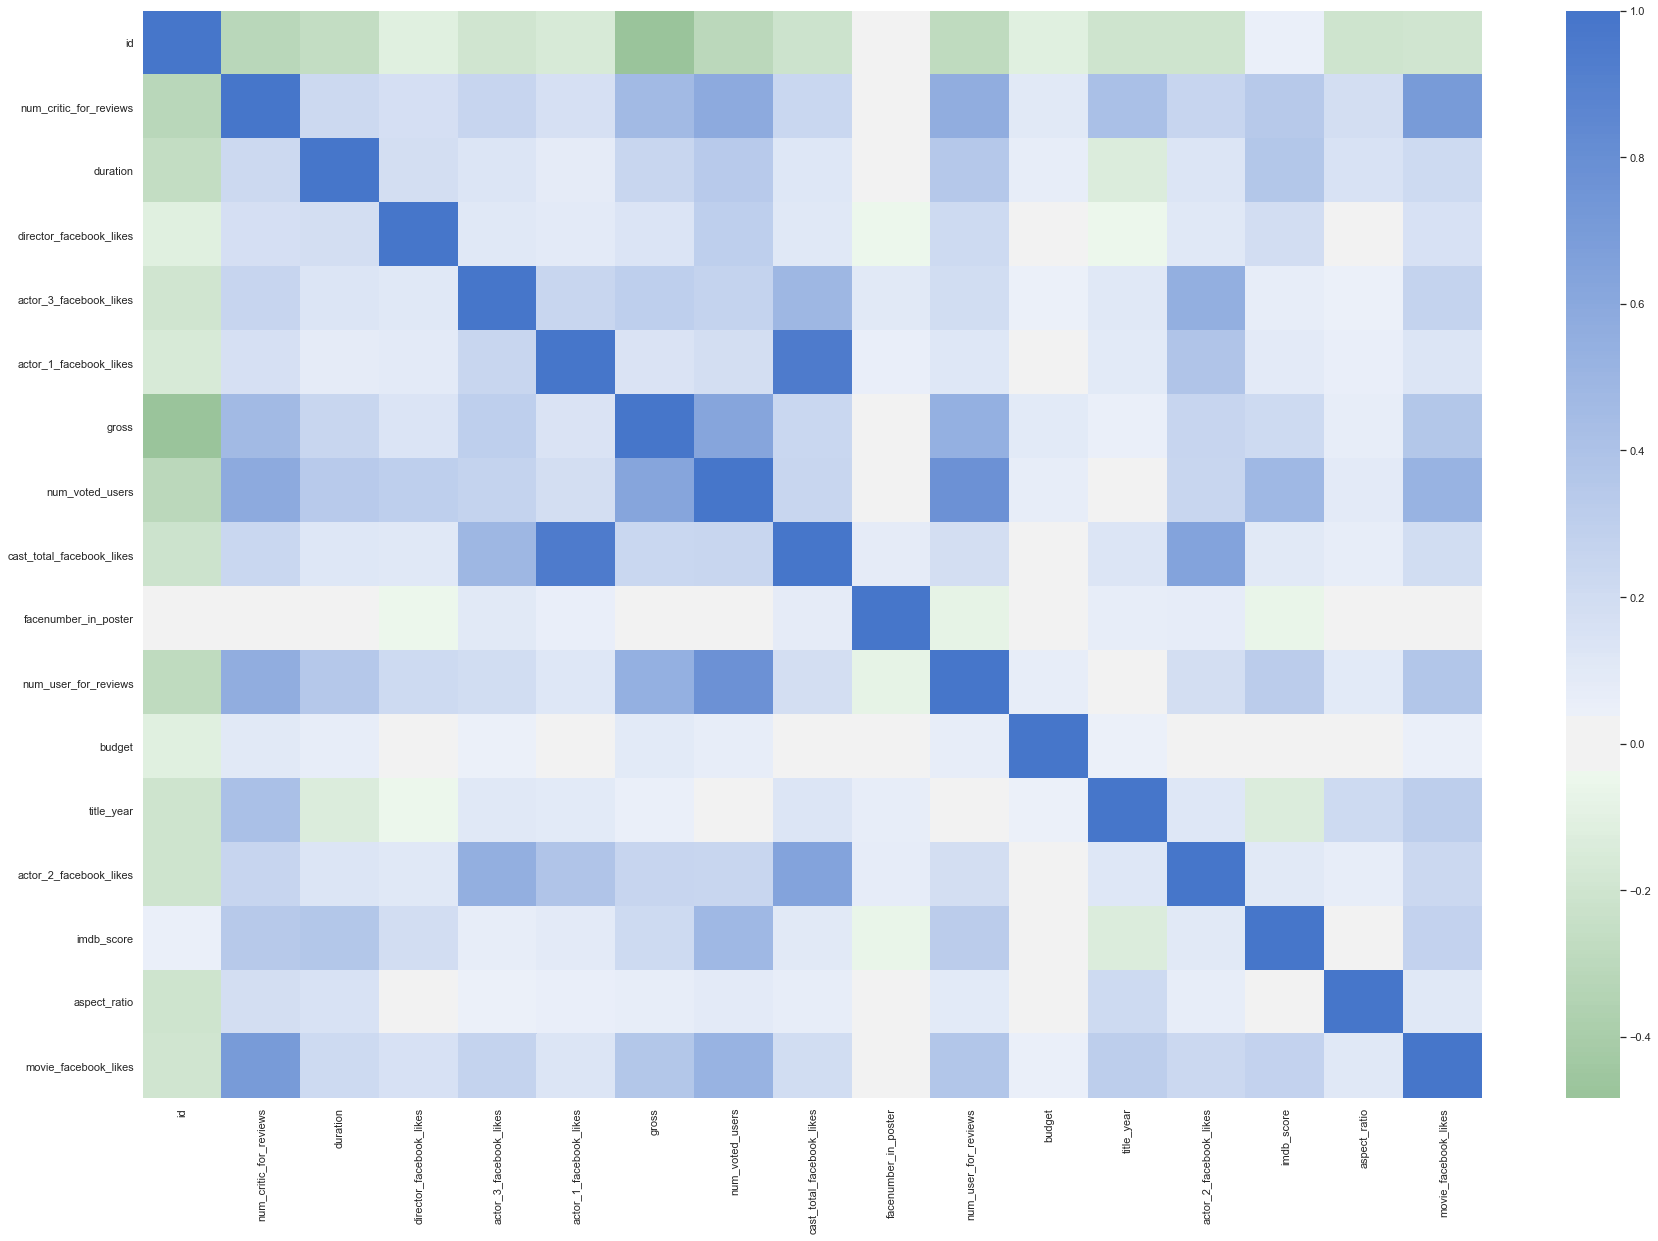

In [19]:
danpallet= sns.diverging_palette(128, 255, l=50, n=7, center="light",as_cmap=True)
plt.figure(figsize=(30,20))
c= df_raw.corr()
sns.heatmap(c,annot=False, center=0, cmap=danpallet)

### Heatmap of variables correlations of raw data
#### Correlations to our target variable imdb_score

most important feature: num_voted_users -confirmed by how the score calculated
https://www.quora.com/How-is-a-film-or-shows-IMDb-score-determined

Form the heatmap of corr of numerical variables above， imdb_score positively highly related to (~>0.3) movie_fb_likes, num_user_for_reviews,num_voted_users,gross, director_fb_likes, duration,num_crtic_for reviews. Negatively highly related to imdb_score: title_year, facenumber_in_poster.

#### I expect movie_facebook_likes to be highly correlated to imdb_score. However, based on the heatmap above, it is not as highly correlated as num_voted_users and num_user_for_reviews. It is about the same level of correlation as duration and num_crtic_for reviews. We can use feature importance plot from models to verify this later.

Many variables are highly correlated, so decide to use tree based methods that do require multicolinearty assumption like multiple linear regression. 

<a id="Feature Engineering"></a>

## Feature Engineering

In [20]:
#check all obj attributes
for col in list(df_raw.select_dtypes(include=['object']).columns):
    print(col)
    print('------------------------------------------------')
    print(df_raw[col].value_counts().sort_values(),'\n')

color
------------------------------------------------
 Black and White     124
Color               3632
Name: color, dtype: int64 

director_name
------------------------------------------------
Sam Firstenberg      1
Troy Miller          1
Theodore Witcher     1
Frederik Du Chau     1
Ed Gass-Donnelly     1
                    ..
Martin Scorsese     16
Ridley Scott        17
Woody Allen         19
Clint Eastwood      19
Steven Spielberg    25
Name: director_name, Length: 1659, dtype: int64 

actor_2_name
------------------------------------------------
Adam Butcher        1
Anupam Kher         1
Madeline Kahn       1
Kendrick Cross      1
Alex Désert         1
                   ..
Meryl Streep       10
James Franco       11
Charlize Theron    14
Brad Pitt          14
Morgan Freeman     20
Name: actor_2_name, Length: 2188, dtype: int64 

genres
------------------------------------------------
Adventure Crime Drama Romance                          1
Action Drama History Romance War We

In [12]:
df1=df_raw

In [22]:
df1["genres"]

0           Action Adventure Fantasy Sci-Fi
1                  Action Adventure Fantasy
2                 Action Adventure Thriller
3                           Action Thriller
5                   Action Adventure Sci-Fi
                       ...                 
5026                    Drama Music Romance
5027                                  Drama
5033                  Drama Sci-Fi Thriller
5035    Action Crime Drama Romance Thriller
5042                            Documentary
Name: genres, Length: 3756, dtype: object

In [23]:
out1 = ' '.join(df1["genres"])
print (out1)

Action Adventure Fantasy Sci-Fi Action Adventure Fantasy Action Adventure Thriller Action Thriller Action Adventure Sci-Fi Action Adventure Romance Adventure Animation Comedy Family Fantasy Musical Romance Action Adventure Sci-Fi Adventure Family Fantasy Mystery Action Adventure Sci-Fi Action Adventure Sci-Fi Action Adventure Action Adventure Fantasy Action Adventure Western Action Adventure Fantasy Sci-Fi Action Adventure Family Fantasy Action Adventure Sci-Fi Action Adventure Fantasy Action Adventure Comedy Family Fantasy Sci-Fi Adventure Fantasy Action Adventure Fantasy Action Adventure Drama History Adventure Fantasy Adventure Family Fantasy Action Adventure Drama Romance Drama Romance Action Adventure Sci-Fi Action Adventure Sci-Fi Thriller Action Adventure Sci-Fi Thriller Action Adventure Thriller Action Adventure Fantasy Romance Action Adventure Sci-Fi Adventure Family Fantasy Action Adventure Fantasy Sci-Fi Thriller Adventure Animation Comedy Family Fantasy Action Adventure Sci

In [24]:
wordlist=out1.split()

wordfreq = [wordlist.count(w) for w in wordlist]

In [25]:
#print("List\n" + str(wordlist) + "\n")
#print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

Pairs
[('Action', 959), ('Adventure', 781), ('Fantasy', 507), ('Sci-Fi', 496), ('Action', 959), ('Adventure', 781), ('Fantasy', 507), ('Action', 959), ('Adventure', 781), ('Thriller', 1117), ('Action', 959), ('Thriller', 1117), ('Action', 959), ('Adventure', 781), ('Sci-Fi', 496), ('Action', 959), ('Adventure', 781), ('Romance', 859), ('Adventure', 781), ('Animation', 196), ('Comedy', 1461), ('Family', 442), ('Fantasy', 507), ('Musical', 96), ('Romance', 859), ('Action', 959), ('Adventure', 781), ('Sci-Fi', 496), ('Adventure', 781), ('Family', 442), ('Fantasy', 507), ('Mystery', 384), ('Action', 959), ('Adventure', 781), ('Sci-Fi', 496), ('Action', 959), ('Adventure', 781), ('Sci-Fi', 496), ('Action', 959), ('Adventure', 781), ('Action', 959), ('Adventure', 781), ('Fantasy', 507), ('Action', 959), ('Adventure', 781), ('Western', 59), ('Action', 959), ('Adventure', 781), ('Fantasy', 507), ('Sci-Fi', 496), ('Action', 959), ('Adventure', 781), ('Family', 442), ('Fantasy', 507), ('Action',

In [26]:
from collections import Counter
words = out1.split(' ')
c = Counter(words)
unique = [w for w in words if c[w] == 1]

print("Unique words: ", unique) # only one movie belongs to 'Film-Noir' genres movie

Unique words:  ['Film-Noir']


In [27]:
unique_words = set(out1.split(' '))

In [28]:
unique_words

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [29]:
len(unique_words) #22 different categories of genres

22

In [30]:
type(unique_words)

set

In [31]:
unique_words_list=['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [32]:
type(unique_words_list)

list

### one hot encoding features for genres

In [94]:
#create one hot encoding features for genres (text column1)
for word in unique_words_list:
    df_raw[word] = 0
    for ind in df_raw.index.values:
        if word in df_raw['genres'][ind]:
            df_raw[word][ind] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [96]:
df_raw.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,0,0,0,0,0,1,0,0,0,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,0,0,0,0,0,0,0,1,0,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,0,0,0,0,0,0,0,1,0,0
5,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
# df_raw.to_csv("df_raw_withgenresFeature.csv", index=False)

In [24]:
df_raw= pd.read_csv('df_raw_withgenresFeature.csv')
df_raw.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,0,0,0,0,0,1,0,0,0,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,0,0,0,0,0,0,0,1,0,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,0,0,0,0,0,0,0,1,0,0
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
df_raw.shape

(3756, 50)

In [13]:
df = df_raw.drop_duplicates(subset='movie_title', keep="first") 
#need to drop_duplicates because duplications have impacts when TFIDF for feature
df.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [7]:
df.shape

(3655, 50)

In [355]:
# df.info()

In [9]:
# df.to_csv("df_raw_withgenresFeatureDropDup.csv", index=False)

<a id="More EDA after Feature Engineering"></a>
## More EDA after Feature Engineering

In [14]:
df_raw_withgenresFeatureDropDup= pd.read_csv("df_raw_withgenresFeatureDropDup.csv")
df_raw_withgenresFeatureDropDup.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,0,0,0,0,0,1,0,0,0,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,0,0,0,0,0,0,0,1,0,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,0,0,0,0,0,0,0,1,0,0
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,0,0,0,0,0,1,0,0,0,0


### Trend with language and country

In [331]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df_raw_withgenresFeatureDropDup2=df_raw_withgenresFeatureDropDup
# df_raw_withgenresFeatureDropDup2['language_code'] = labelencoder.fit_transform(df_raw_withgenresFeatureDropDup['language']).astype(np.int8)
# df_raw_withgenresFeatureDropDup2['language_code'].head()

0    9
1    9
2    9
3    9
4    9
Name: language_code, dtype: int8

In [347]:
df_raw_withgenresFeatureDropDup['language'].unique()
# len(df_raw_withgenresFeatureDropDup['language'].unique()) #34

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
       'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
       'Norwegian', 'Czech', 'Russian', 'None', 'Zulu', 'Hebrew',
       'Arabic', 'Vietnamese', 'Indonesian', 'Romanian', 'Persian'],
      dtype=object)

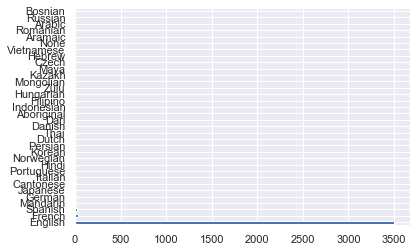

In [348]:
#View number of records by language
df_clean = df_raw_withgenresFeatureDropDup["language"].value_counts()
df_clean.plot(kind = 'barh').figsize=(40,25)

In [349]:
df_raw_withgenresFeatureDropDup['country'].unique()

# len(df_raw_withgenresFeatureDropDup['country'].unique()) #45


array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
       'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
       'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
       'India', 'Mexico', 'Brazil', 'Finland', 'Norway', 'Iceland',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan'], dtype=object)

#### This collection of data contains movies in 34 languages and 45 countries. Majority of the data in this collection are movies in English. The “language vs smaple size” plot indicates data in languages other than English are very limited. Thus, the prediction for movies in other language could be less accurate. This is how some times the models could be biased.

In [342]:
df_raw_withgenresFeatureDropDup.reduced=df_raw_withgenresFeatureDropDup2[['imdb_score','num_critic_for_reviews','duration','director_facebook_likes',
                                                                         'gross','num_voted_users',
                                                                        'cast_total_facebook_likes','facenumber_in_poster',
                                                                        'num_user_for_reviews','language']]


df_raw_withgenresFeatureDropDup.reduced.head()

#'actor_3_facebook_likes','actor_1_facebook_likes', 'title_year', 'actor_2_facebook_likes',

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language
0,7.9,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,English
1,7.1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,English
2,6.8,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,English
3,8.5,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,English
4,6.6,462.0,132.0,475.0,73058679.0,212204,1873,1.0,738.0,English


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


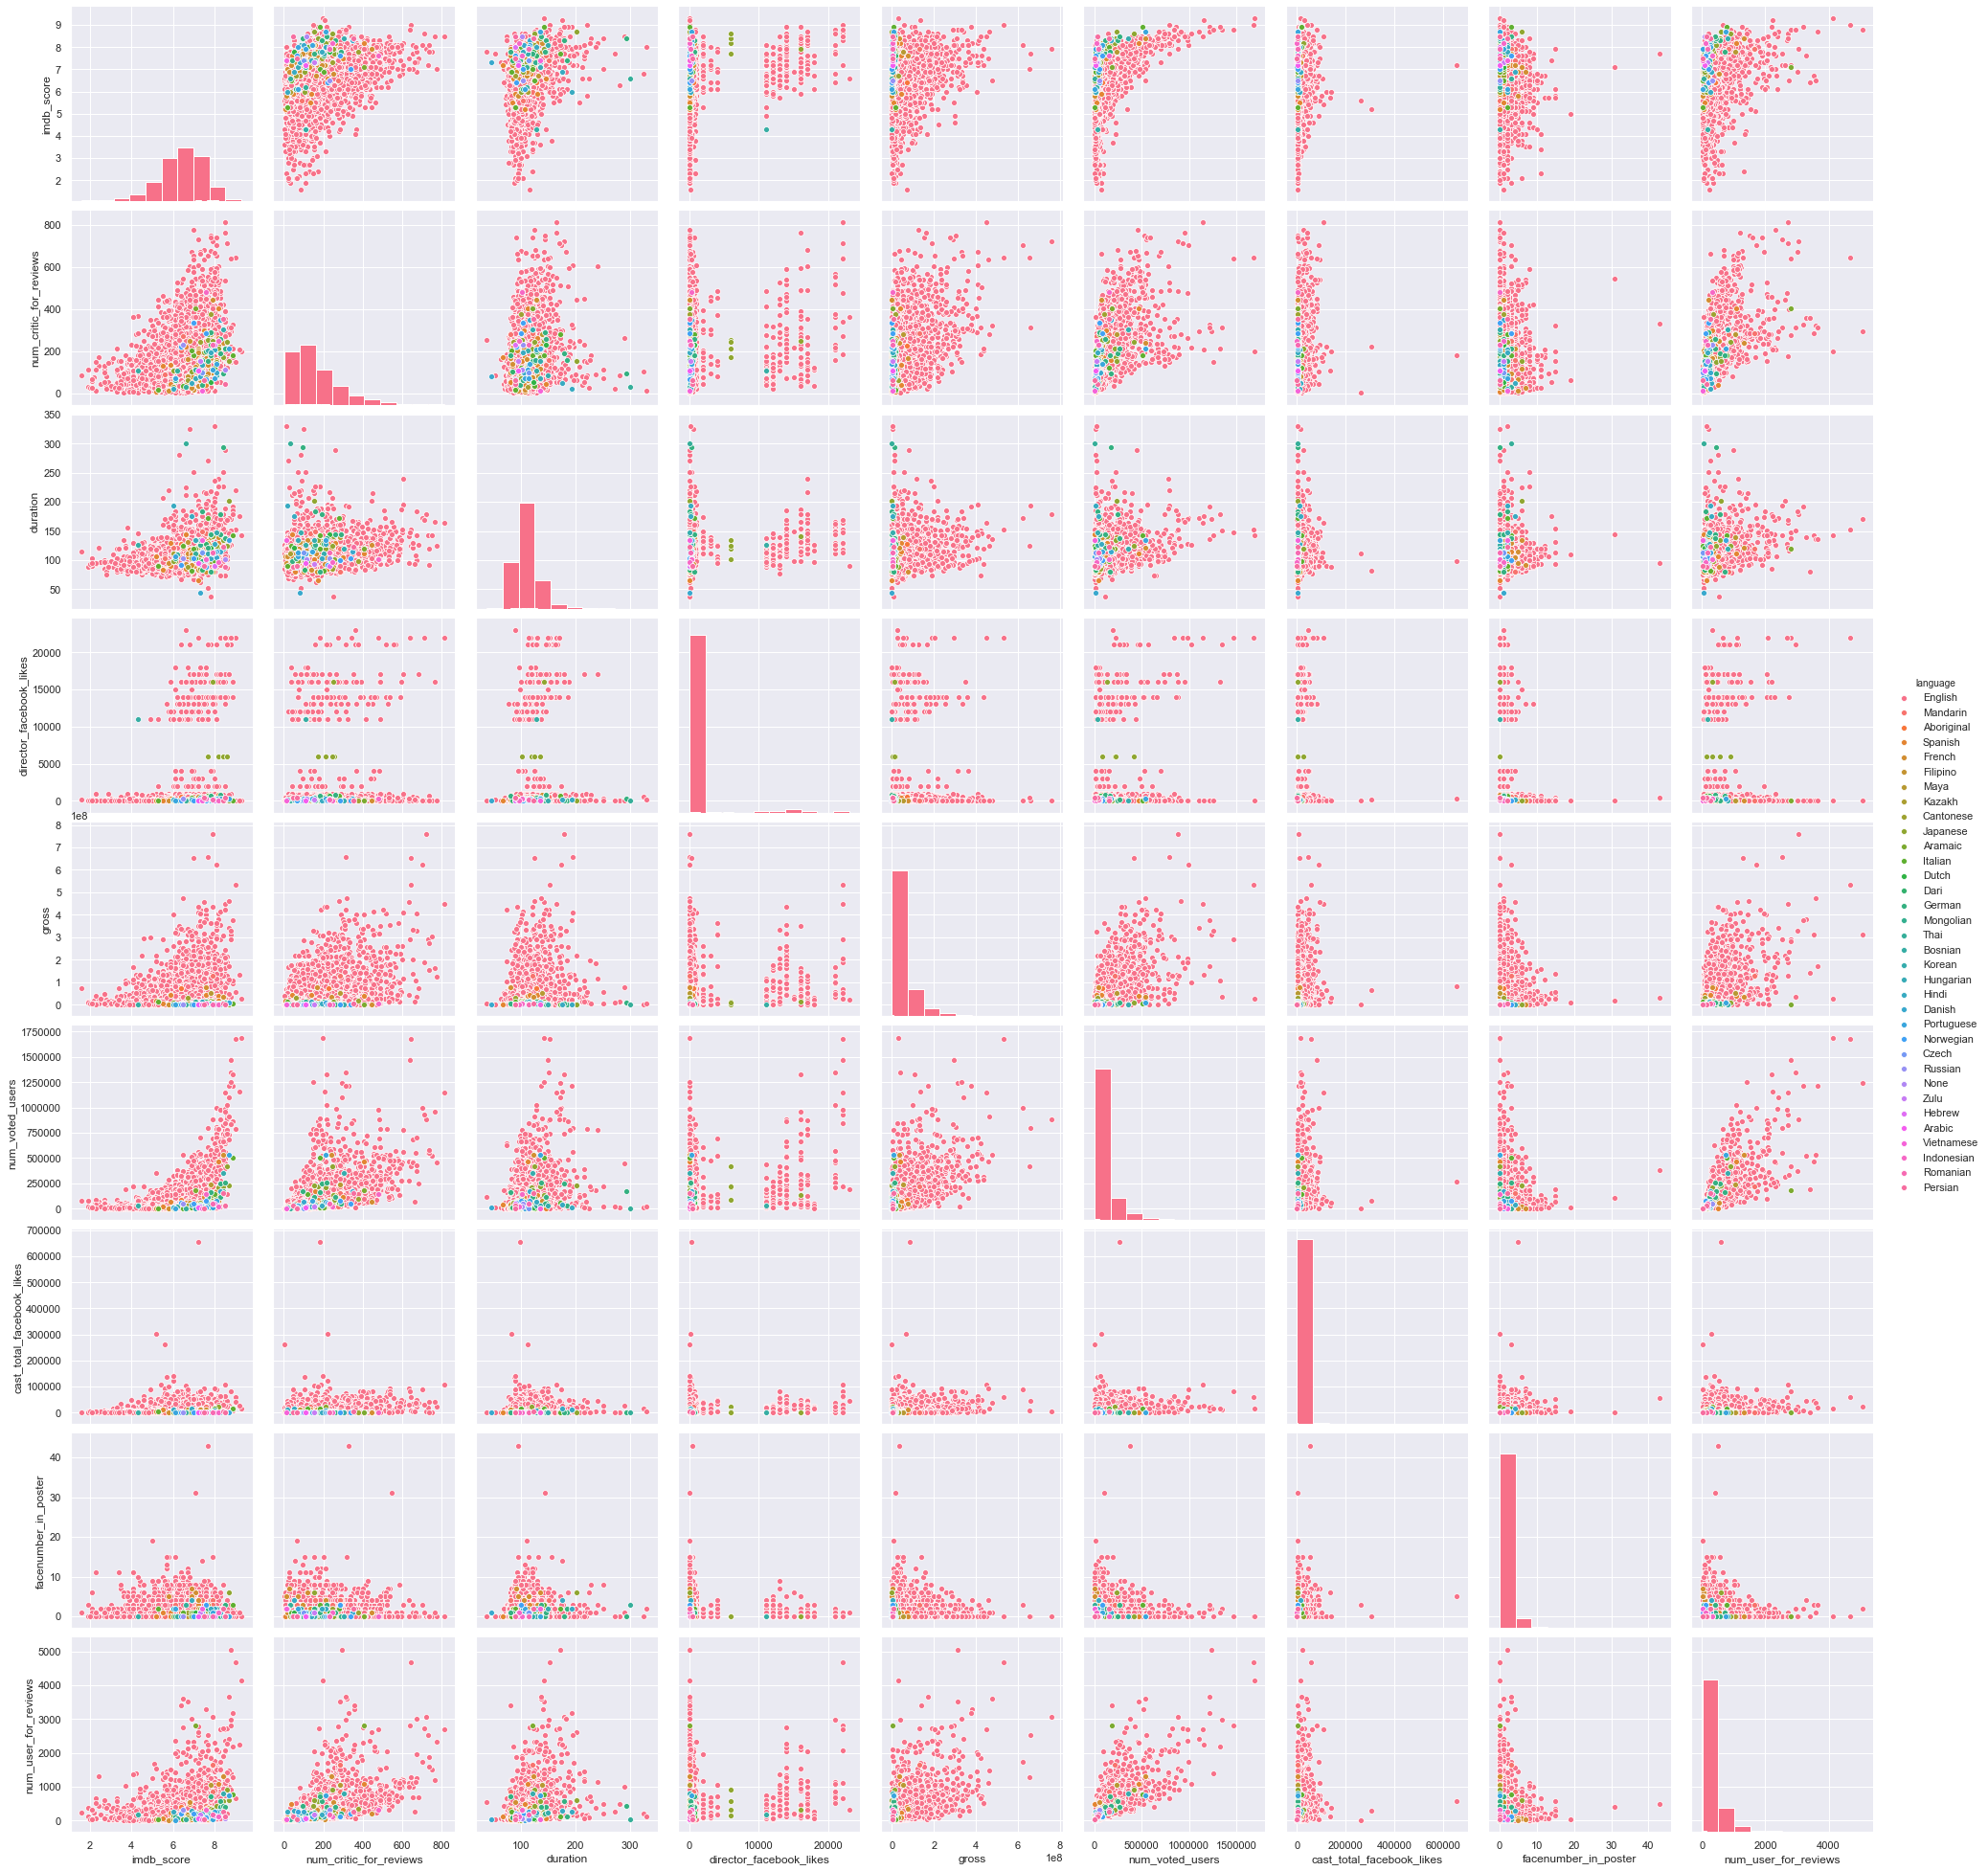

In [343]:
sns.pairplot(df_raw_withgenresFeatureDropDup.reduced, hue="language", size=3, diag_kind='hist')

#### From the pairplot above, we can see the num_user_for_reviews， num_voted_users  tend to be small in other languages rather than English. In addition, num_user_for_reviews and num_voted_users are highly correlated. If we build a multiple linear regression model, we need to exclude one of these two features.

#### Next, let's check the distribution of number of words in the movie_titles.

In [237]:
df_raw_withgenresFeatureDropDup['movie_title_count'] = df_raw_withgenresFeatureDropDup['movie_title'].apply(lambda x:len(x.strip().split()))


In [238]:
df_raw_withgenresFeatureDropDup['movie_title_count'].describe()

count    3655.000000
mean        2.766621
std         1.599631
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: movie_title_count, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210ACE45E48>]],
      dtype=object)

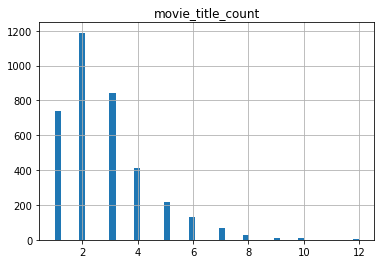

In [239]:
df_raw_withgenresFeatureDropDup.hist(column='movie_title_count', bins=50)
#movie_title word count: number of words in the movie_titles

#### From the plot above, we can see most movies have 1-3 words in the title.

In [240]:
df_raw_withgenresFeatureDropDup['genres_count'] = df_raw_withgenresFeatureDropDup['genres'].apply(lambda x:len(x.strip().split()))


In [241]:
df_raw_withgenresFeatureDropDup['genres_count'].describe()

count    3655.000000
mean        2.988509
std         1.181355
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: genres_count, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210AF8B5648>]],
      dtype=object)

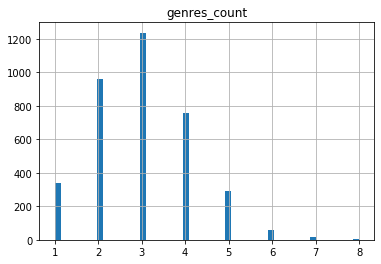

In [242]:
df_raw_withgenresFeatureDropDup.hist(column='genres_count', bins=50)

#### From the plot above, we can see most movies have 2-4 genres as labeled in the data.

#### Take a closer look of important attributes.

Title: movie_facebook_likes vs. mdb_score


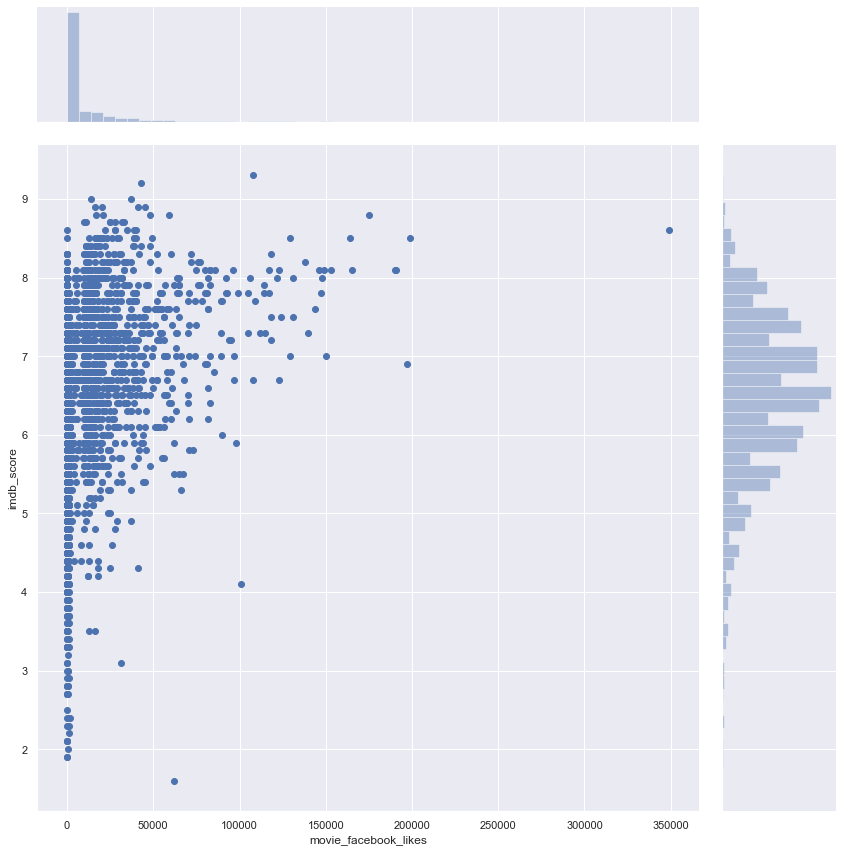

In [294]:
sns.jointplot(x="movie_facebook_likes", y="imdb_score", data=df_raw_withgenresFeatureDropDup, size=12)
print("Title: movie_facebook_likes vs. mdb_score")

#### movie_facebook_likes variable should be highly correlated with target variable imdb_score in my intuition. 
 So let's take a closer look of the scatter plot of these two variables.
#### The result in the plot above shows the movies liked a lot tend to get higher score but they are not linearly correlated. In addition, there are many movies that not liked a lot but get pretty high rating.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Title: num_voted_users vs. mdb_score


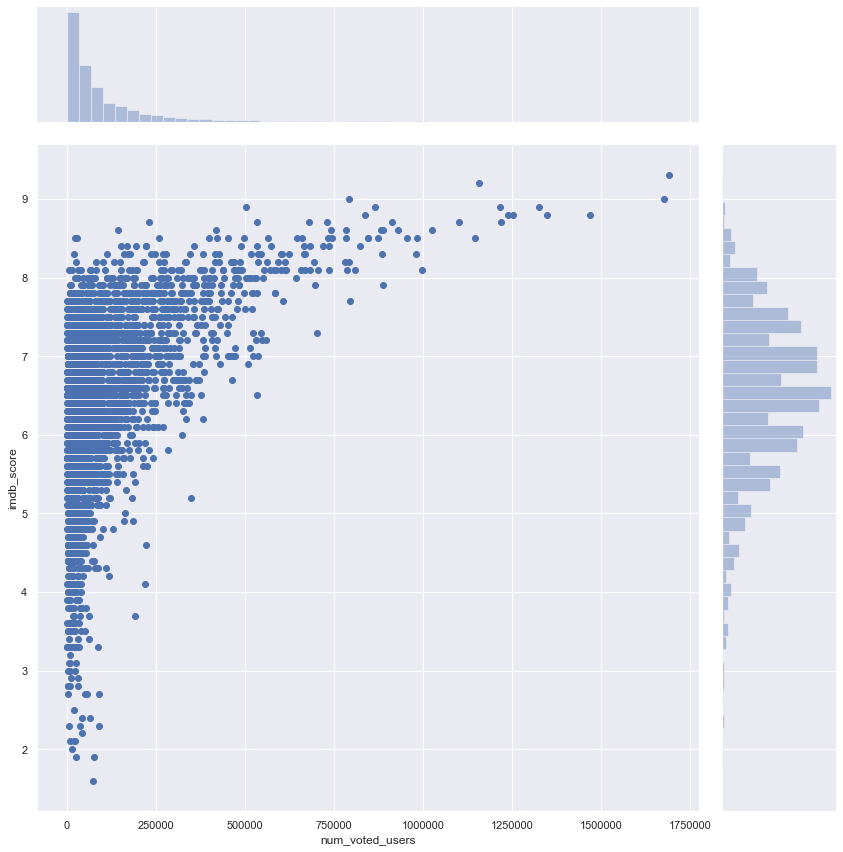

In [296]:

sns.jointplot(x="num_voted_users", y="imdb_score", data=df_raw_withgenresFeatureDropDup, size=12)
print("Title: num_voted_users vs. mdb_score")

#### num_voted_users is another variable that was identified as highly correlated with target variable imdb_score. 
 So let's take a closer look of the scatter plot of these two variables.
####  The result in the plot above shows highly voted movies tend to get higher score but they are not linearly correlated.

#### Next, let's check how many movies labeled in each genre.

In [35]:
unique_genres_list=['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']


GenresDistribution=[]

for g in unique_genres_list:
    GenresDistribution.append(df_raw_withgenresFeatureDropDup[g].sum())

In [36]:
GenresDistribution

[924,
 752,
 194,
 237,
 1442,
 692,
 45,
 1845,
 431,
 486,
 1,
 146,
 373,
 230,
 95,
 371,
 839,
 478,
 143,
 1074,
 149,
 57]

In [37]:
dfGenresDistribution=pd.DataFrame(list(zip(unique_genres_list, GenresDistribution)))
dfGenresDistribution.columns=['GenreName','SampleSize']

Title: SampleSize of each genre


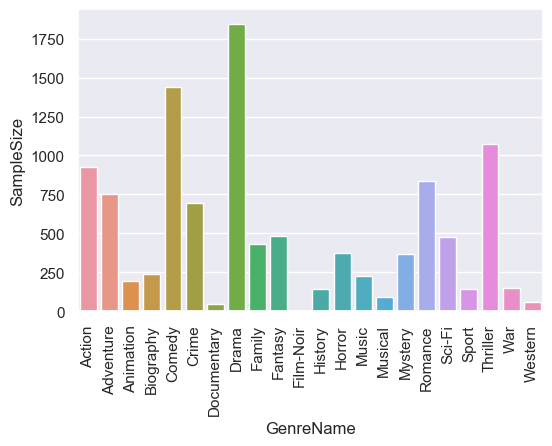

In [38]:
#plt.figure(figsize=(10,5))
chart = sns.barplot(x="GenreName", y="SampleSize", data=dfGenresDistribution) #
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print("Title: SampleSize of each genre")

In [41]:
df_raw_withgenresFeatureDropDup.genres[0]

'Action Adventure Fantasy Sci-Fi'

In [51]:
genre_score = []
for genre in unique_genres_list:
    genre_score.append(statistics.mean(df_raw_withgenresFeatureDropDup.loc[df_raw_withgenresFeatureDropDup[genre] == 1,"imdb_score"]))
dict(zip(unique_genres_list,genre_score))


{'Action': 6.285064935064935,
 'Adventure': 6.448803191489362,
 'Animation': 6.702577319587629,
 'Biography': 7.156118143459915,
 'Comedy': 6.186407766990291,
 'Crime': 6.545231213872833,
 'Documentary': 6.988888888888889,
 'Drama': 6.795555555555556,
 'Family': 6.205800464037123,
 'Fantasy': 6.281069958847737,
 'Film-Noir': 7.7,
 'History': 7.152739726027397,
 'Horror': 5.897050938337801,
 'Music': 6.450434782608696,
 'Musical': 6.588421052631579,
 'Mystery': 6.477358490566037,
 'Romance': 6.433253873659118,
 'Sci-Fi': 6.32907949790795,
 'Sport': 6.5867132867132865,
 'Thriller': 6.371508379888268,
 'War': 7.057046979865771,
 'Western': 6.812280701754386}

In [56]:
dfGenresRating=pd.DataFrame(list(zip(unique_genres_list,genre_score)))
dfGenresRating.columns=['GenreName','AvgRating']

Title: Average Rating of each genre


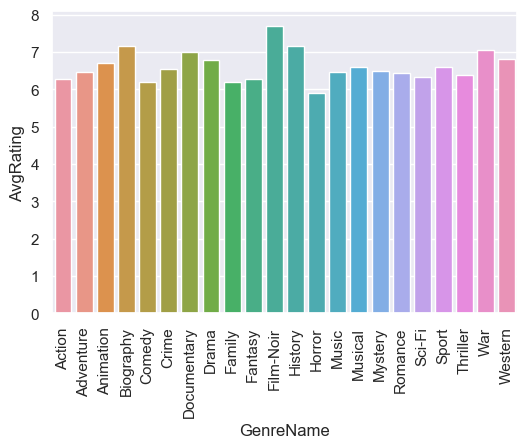

In [58]:
chart = sns.barplot(x="GenreName", y="AvgRating", data=dfGenresRating) #
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print("Title: Average Rating of each genre")

#### The plot above shows Dramma, Comedy and Thriller are the top 3 most abundant types of movies in this data collection.

#### Most frequent directors and actors in the dataset. 

In [15]:
nums=df_raw_withgenresFeatureDropDup['director_name']. values. tolist()

In [16]:
# alternate
from collections import Counter


def top_k(numbers, k=10):
    """The counter.most_common([k]) method works
    in the following way:
    >>> Counter('abracadabra').most_common(3)  
    [('a', 5), ('r', 2), ('b', 2)]
    """

    c = Counter(numbers)
    most_common = [key for key, val in c.most_common(k)]

    return most_common  #generate a list of top items

In [62]:
top_directors=top_k(nums,20)
# type(top_directors)
# top_directors

In [67]:
all_directors=top_k(nums,1659)

In [318]:
from collections import Counter
counts=Counter(nums)
common = counts.most_common(20)
print("Top directors:")
common 

# labels = [item[0] for item in common]
# number = [item[1] for item in common]
# nbars = len(common)

# plt.bar(np.arange(nbars), number,width=barWidth, tick_label=labels)
# plt.xticks(rotation = 90, fontweight='bold',fontsize=12,)
# plt.show()


Top directors:


[('Steven Spielberg', 25),
 ('Clint Eastwood', 19),
 ('Woody Allen', 19),
 ('Ridley Scott', 16),
 ('Martin Scorsese', 16),
 ('Steven Soderbergh', 15),
 ('Renny Harlin', 15),
 ('Spike Lee', 15),
 ('Tim Burton', 14),
 ('Robert Zemeckis', 13),
 ('Oliver Stone', 13),
 ('Ron Howard', 13),
 ('Barry Levinson', 13),
 ('Robert Rodriguez', 13),
 ('Michael Bay', 12),
 ('Joel Schumacher', 12),
 ('Tony Scott', 12),
 ('Shawn Levy', 11),
 ('Chris Columbus', 11),
 ('Rob Reiner', 11)]

In [63]:
import statistics
top_director_scores = []
for director in top_directors:
    top_director_scores.append(statistics.mean(df_raw_withgenresFeatureDropDup.loc[df_raw_withgenresFeatureDropDup.director_name == director,"imdb_score"]))
dict_top_director_score = dict(zip(top_directors,top_director_scores))
dict_top_director_score

{'Steven Spielberg': 7.544,
 'Clint Eastwood': 7.205263157894737,
 'Woody Allen': 7.0,
 'Ridley Scott': 7.13125,
 'Martin Scorsese': 7.675,
 'Steven Soderbergh': 6.68,
 'Renny Harlin': 5.746666666666667,
 'Spike Lee': 6.733333333333333,
 'Tim Burton': 7.05,
 'Robert Zemeckis': 7.3076923076923075,
 'Oliver Stone': 6.907692307692308,
 'Ron Howard': 6.930769230769231,
 'Barry Levinson': 6.576923076923077,
 'Robert Rodriguez': 5.6923076923076925,
 'Michael Bay': 6.616666666666666,
 'Joel Schumacher': 6.341666666666667,
 'Tony Scott': 6.791666666666667,
 'Shawn Levy': 6.090909090909091,
 'Chris Columbus': 6.654545454545454,
 'Rob Reiner': 7.0181818181818185}

Title: Average Rating of top Directors


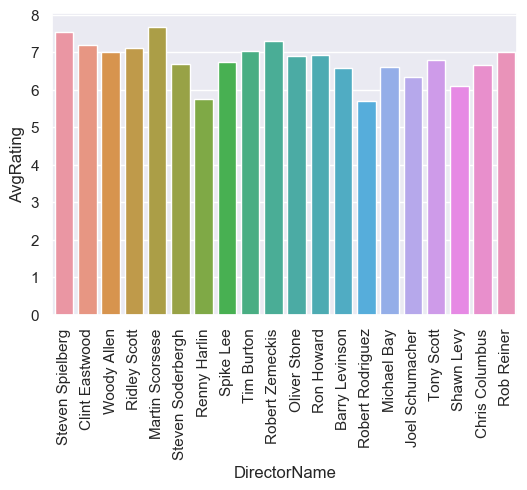

In [65]:
dfDirectorRating=pd.DataFrame(list(zip(top_directors,top_director_scores)))
dfDirectorRating.columns=['DirectorName','AvgRating']
chart = sns.barplot(x="DirectorName", y="AvgRating", data=dfDirectorRating) #
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print("Title: Average Rating of top Directors")

In [70]:
import statistics
all_director_scores = []
for director in all_directors:
    all_director_scores.append(statistics.mean(df_raw_withgenresFeatureDropDup.loc[df_raw_withgenresFeatureDropDup.director_name == director,"imdb_score"]))
dict_top_director_score = dict(zip(all_directors,all_director_scores))
#dict_top_director_score
dfAllDirectorRating=pd.DataFrame(list(zip(all_directors,all_director_scores)))
dfAllDirectorRating.columns=['DirectorName','AvgRating']

In [72]:
dfAllDirectorRating.sort_values(by=['AvgRating'])

,DirectorName,AvgRating
1272,Vondie Curtis-Hall,2.1
1314,Alex Zamm,2.3
742,Roger Christian,2.4
265,Jason Friedberg,2.6
973,Aaron Seltzer,2.7
...,...,...
1447,Damien Chazelle,8.5
1643,Majid Majidi,8.5
1542,Charles Chaplin,8.6
1221,Tony Kaye,8.6


#### From the plots and tables regarding directors above, we can see top frequent directors are not the top rated directors. In addition, top rated directors can get AvgRating score above 8.5 while worest rated directors could  get AvgRating score as low as 2.1.

In [31]:

nums2=df_raw_withgenresFeatureDropDup['actor_1_name']. values. tolist()

print("Top actor_1_name:")
counts=Counter(nums2)
common = counts.most_common(20)
common 

Top actor_1_name:


[('Robert De Niro', 42),
 ('Johnny Depp', 34),
 ('Nicolas Cage', 30),
 ('J.K. Simmons', 29),
 ('Denzel Washington', 29),
 ('Bruce Willis', 27),
 ('Matt Damon', 27),
 ('Robert Downey Jr.', 26),
 ('Harrison Ford', 25),
 ('Robin Williams', 25),
 ('Liam Neeson', 24),
 ('Steve Buscemi', 24),
 ('Tom Hanks', 24),
 ('Jason Statham', 24),
 ('Bill Murray', 24),
 ('Tom Cruise', 23),
 ('Kevin Spacey', 22),
 ('Keanu Reeves', 22),
 ('Morgan Freeman', 22),
 ('Christian Bale', 21)]

In [32]:
top_actor1=top_k(nums2,20)
#top_actor1

In [50]:
actor1_scores = []
for actor in top_actor1:
    actor1_scores.append(statistics.mean(df_raw_withgenresFeatureDropDup.loc[df_raw_withgenresFeatureDropDup.actor_1_name == actor,"imdb_score"]))
dict_actor1_score = dict(zip(top_actor1,actor1_scores))
dict_actor1_score

{'Robert De Niro': 6.70952380952381,
 'Johnny Depp': 6.85,
 'Nicolas Cage': 6.266666666666667,
 'J.K. Simmons': 6.662068965517241,
 'Denzel Washington': 7.055172413793104,
 'Bruce Willis': 6.622222222222222,
 'Matt Damon': 6.962962962962963,
 'Robert Downey Jr.': 6.815384615384615,
 'Harrison Ford': 7.164,
 'Robin Williams': 6.5760000000000005,
 'Liam Neeson': 6.516666666666667,
 'Steve Buscemi': 6.479166666666667,
 'Tom Hanks': 7.425,
 'Jason Statham': 6.5125,
 'Bill Murray': 6.879166666666666,
 'Tom Cruise': 7.126086956521739,
 'Kevin Spacey': 7.15,
 'Keanu Reeves': 6.754545454545455,
 'Morgan Freeman': 6.845454545454546,
 'Christian Bale': 7.261904761904762}

Title: Average Rating of top Actor1s


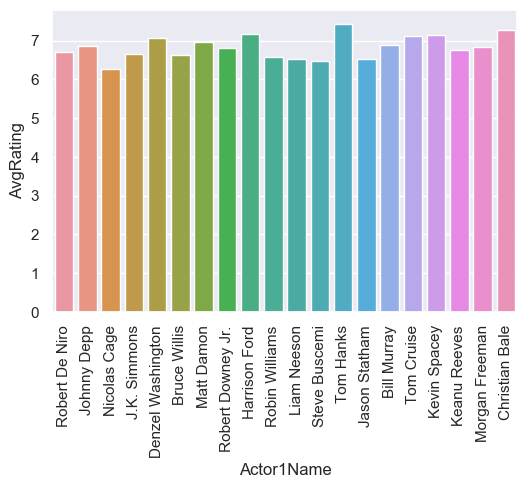

In [66]:
dfActor1Rating=pd.DataFrame(list(zip(top_actor1,actor1_scores)))
dfActor1Rating.columns=['Actor1Name','AvgRating']
chart = sns.barplot(x="Actor1Name", y="AvgRating", data=dfActor1Rating) #
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print("Title: Average Rating of top Actor1s")

<a id="More Feature Engineering"></a>
## More Feature Engineering

### label encoding for people's name features

#### For future predctions: unknown actors or directors in new test data just label as unknown.

In [20]:
len(df_raw['director_name'].unique()) # number of unique value for directors, int16 is enough

1659

In [27]:
len(df['director_name'].unique())

1659

In [21]:
len(df_raw['actor_1_name'].unique())

1428

In [22]:
len(df_raw['actor_2_name'].unique())

2188

In [23]:
len(df_raw['actor_3_name'].unique())

2587

In [10]:
# label encoding for director_name , actor_2_name , actor_1_name, actor_3_name

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [28]:
df['director_name'] = labelencoder.fit_transform(df['director_name']).astype(np.int16)
df['director_name'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     620
1     538
2    1395
3     251
4      62
Name: director_name, dtype: int16

In [30]:
# df.info()

In [31]:
name_cols=['actor_1_name','actor_2_name','actor_3_name']
for col in name_cols:
    df[col] = labelencoder.fit_transform(df[col]).astype(np.int16)

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Color,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,...,0,0,0,0,0,1,0,0,0,0
1,1,Color,538,302.0,169.0,563.0,1000.0,1591,40000.0,309404152.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Color,1395,602.0,148.0,0.0,161.0,1794,11000.0,200074175.0,...,0,0,0,0,0,0,0,1,0,0
3,3,Color,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,...,0,0,0,0,0,0,0,1,0,0
4,5,Color,62,462.0,132.0,475.0,530.0,1836,640.0,73058679.0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
df['actor_1_name']

0        189
1        686
2        258
3       1339
4        323
        ... 
3751     867
3752     449
3753    1232
3754     198
3755     664
Name: actor_1_name, Length: 3655, dtype: int16

In [57]:
#df.info()

### Create plot_keywords Features
#### TFIDF and then PCA

In [34]:
# text column2,3=plot_keywords,movie_title
df['plot_keywords'].head  #all lower words

<bound method NDFrame.head of 0                  avatar future marine native paraplegic
1       goddess marriage ceremony marriage proposal pi...
2                     bomb espionage sequel spy terrorist
3       deception imprisonment lawlessness police offi...
4       alien american civil war male nipple mars prin...
                              ...                        
3751                       jail junkie money motel singer
3752            abortion bus hospital prison prostitution
3753    changing the future independent film invention...
3754                   assassin death guitar gun mariachi
3755    actress name in title crush date four word tit...
Name: plot_keywords, Length: 3655, dtype: object>

In [56]:
out2 = ' '.join(df['plot_keywords'])
#print (out2)

In [40]:
unique_words_keyword = set(out2.split(' '))
len(unique_words_keyword)

5361

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

tf_idf_vectorizor = TfidfVectorizer(max_features = 2**12)
tf_idf = tf_idf_vectorizor.fit_transform(df.plot_keywords)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
df_keyword=pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

In [46]:
df_keyword.head(10)

,007,10,1000000,11,1190s,12,12th,13,130,13th,...,zealot,zeppelin,zero,zeus,zodiac,zoloft,zombie,zone,zoo,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
sklearn_pca = PCA(n_components = 30)
X = sklearn_pca.fit_transform(tf_idf_array)
X

array([[-0.01896409, -0.01518346, -0.02828556, ...,  0.02154   ,
        -0.01141797, -0.00253466],
       [-0.0126176 , -0.01516486, -0.01419408, ..., -0.00982137,
         0.01371154, -0.04199725],
       [-0.03056258, -0.00499277, -0.04261811, ...,  0.00912814,
         0.02055424,  0.09217218],
       ...,
       [-0.02824348, -0.02477028, -0.05577609, ...,  0.02899292,
         0.11729049, -0.03424548],
       [-0.03342381, -0.0300906 , -0.02840697, ...,  0.00621738,
         0.02014707,  0.00424666],
       [ 0.06158391,  0.00226209, -0.04272103, ..., -0.02073938,
        -0.00111845, -0.03128439]])

In [48]:
df_keyword_final=pd.DataFrame(X)

In [49]:
df_keyword_final.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.018964,-0.015183,-0.028286,-0.017594,0.000737,0.004352,-0.036545,-0.014743,0.003570,-0.023851,...,-0.015294,-0.015392,0.006809,-0.005193,0.001216,0.020714,0.013714,0.021540,-0.011418,-0.002535
1,-0.012618,-0.015165,-0.014194,-0.013045,0.025660,-0.004300,-0.042650,-0.017965,-0.027541,-0.018048,...,-0.022790,0.011625,0.044543,0.002407,-0.057157,0.005947,-0.005100,-0.009821,0.013712,-0.041997
2,-0.030563,-0.004993,-0.042618,-0.030021,-0.018421,0.008918,-0.051070,-0.003430,0.052901,-0.000994,...,0.037528,-0.016702,0.096977,0.137811,-0.145362,0.059380,0.054986,0.009128,0.020554,0.092172
3,-0.041252,0.024826,-0.050646,-0.121399,-0.153052,-0.043957,0.171193,-0.193896,0.005536,0.041496,...,0.029708,-0.009470,0.007101,0.078451,-0.001853,0.003479,-0.013616,0.010360,-0.002353,0.014428
4,0.091743,-0.016772,-0.022791,-0.012832,0.006085,0.037656,-0.103743,-0.054547,-0.001429,-0.082509,...,0.007138,0.029881,-0.058796,0.071413,0.065287,0.009385,-0.034680,-0.016214,-0.066344,0.012168


In [50]:
df_keyword_final.columns = ['PC0', 'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29']

In [51]:
df_keyword_final.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,-0.018964,-0.015183,-0.028286,-0.017594,0.000737,0.004352,-0.036545,-0.014743,0.003570,-0.023851,...,-0.015294,-0.015392,0.006809,-0.005193,0.001216,0.020714,0.013714,0.021540,-0.011418,-0.002535
1,-0.012618,-0.015165,-0.014194,-0.013045,0.025660,-0.004300,-0.042650,-0.017965,-0.027541,-0.018048,...,-0.022790,0.011625,0.044543,0.002407,-0.057157,0.005947,-0.005100,-0.009821,0.013712,-0.041997
2,-0.030563,-0.004993,-0.042618,-0.030021,-0.018421,0.008918,-0.051070,-0.003430,0.052901,-0.000994,...,0.037528,-0.016702,0.096977,0.137811,-0.145362,0.059380,0.054986,0.009128,0.020554,0.092172
3,-0.041252,0.024826,-0.050646,-0.121399,-0.153052,-0.043957,0.171193,-0.193896,0.005536,0.041496,...,0.029708,-0.009470,0.007101,0.078451,-0.001853,0.003479,-0.013616,0.010360,-0.002353,0.014428
4,0.091743,-0.016772,-0.022791,-0.012832,0.006085,0.037656,-0.103743,-0.054547,-0.001429,-0.082509,...,0.007138,0.029881,-0.058796,0.071413,0.065287,0.009385,-0.034680,-0.016214,-0.066344,0.012168


In [52]:
df_keyword_final.shape

(3655, 30)

In [53]:
df_keywordFeatures=pd.concat([df, df_keyword_final], axis=1)
df_keywordFeatures.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,0.0,Color,620.0,723.0,178.0,0.0,855.0,1002.0,1000.0,760505847.0,...,-0.015294,-0.015392,0.006809,-0.005193,0.001216,0.020714,0.013714,0.021540,-0.011418,-0.002535
1,1.0,Color,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,...,-0.022790,0.011625,0.044543,0.002407,-0.057157,0.005947,-0.005100,-0.009821,0.013712,-0.041997
2,2.0,Color,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,...,0.037528,-0.016702,0.096977,0.137811,-0.145362,0.059380,0.054986,0.009128,0.020554,0.092172
3,3.0,Color,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,...,0.029708,-0.009470,0.007101,0.078451,-0.001853,0.003479,-0.013616,0.010360,-0.002353,0.014428
4,5.0,Color,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,...,0.007138,0.029881,-0.058796,0.071413,0.065287,0.009385,-0.034680,-0.016214,-0.066344,0.012168


In [54]:
df_keywordFeatures.info() #director name and actor name become float 64 after concat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3755
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3655 non-null   float64
 1   color                      3655 non-null   object 
 2   director_name              3655 non-null   float64
 3   num_critic_for_reviews     3655 non-null   float64
 4   duration                   3655 non-null   float64
 5   director_facebook_likes    3655 non-null   float64
 6   actor_3_facebook_likes     3655 non-null   float64
 7   actor_2_name               3655 non-null   float64
 8   actor_1_facebook_likes     3655 non-null   float64
 9   gross                      3655 non-null   float64
 10  genres                     3655 non-null   object 
 11  actor_1_name               3655 non-null   float64
 12  movie_title                3655 non-null   object 
 13  num_voted_users            3655 non-null   float

### movie_title Features
#### universal sentence encoder (USE)

In [55]:
df['movie_title'].head

<bound method NDFrame.head of 0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
3751                                       Clean
3752                                  The Circle
3753                                      Primer
3754                                 El Mariachi
3755                           My Date with Drew
Name: movie_title, Length: 3655, dtype: object>

In [60]:
data=df['movie_title'].values.tolist()
data

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz the Great and Powerful',
 'The Amazing Spider-Man 2',


In [59]:
import tensorflow as tf

print(tf.__version__)

import tensorflow_hub as hub

# embed_L = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

2.1.0


In [63]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [64]:
embeddings = embed(data)["outputs"]

print(embeddings)

tf.Tensor(
[[-0.03512486 -0.04652005 -0.02655166 ... -0.0632797   0.07680547
  -0.06827116]
 [ 0.0336685  -0.03004144 -0.00926566 ... -0.06517769  0.08283429
  -0.02942577]
 [ 0.03810423 -0.07019215 -0.00290216 ... -0.03161623  0.07772546
   0.00989674]
 ...
 [ 0.04264739 -0.01671686  0.06656683 ... -0.03506789  0.08214969
   0.00650347]
 [ 0.02291321 -0.00569303  0.08499023 ... -0.0729431   0.08199745
  -0.08701231]
 [-0.06564461 -0.05178278  0.03571626 ... -0.04576578  0.07359581
  -0.02721113]], shape=(3655, 512), dtype=float32)


In [65]:
df_titleFeatures=pd.DataFrame(np.array(embeddings))


In [74]:
df_titleFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.035125,-0.046520,-0.026552,-0.012602,0.028461,0.065281,0.039563,-0.018583,-0.029561,0.051976,...,-0.021879,-0.075990,0.006918,0.002654,-0.063638,0.040051,-0.037305,-0.063280,0.076805,-0.068271
1,0.033668,-0.030041,-0.009266,-0.055274,-0.018426,0.000082,-0.037840,-0.040319,-0.021896,0.001484,...,-0.040588,0.039981,-0.039894,-0.019905,-0.046029,0.063854,0.011182,-0.065178,0.082834,-0.029426
2,0.038104,-0.070192,-0.002902,-0.031135,0.039070,-0.083374,0.019156,0.005829,0.011865,0.001650,...,0.017335,-0.082629,0.066084,-0.034422,0.051730,0.011837,-0.025263,-0.031616,0.077725,0.009897
3,0.028602,-0.050350,0.012359,0.003934,0.041842,-0.028864,0.034500,-0.003428,0.037257,0.025099,...,0.008498,-0.053356,-0.057350,-0.035506,0.063508,0.007047,-0.050378,-0.011841,0.090319,0.005731
4,-0.040199,-0.017164,-0.027068,0.023305,-0.043684,0.053279,0.060008,-0.023996,0.048245,-0.003718,...,-0.036614,-0.076430,0.009896,-0.004886,-0.061042,0.070675,0.014218,0.035632,0.077763,0.055855


In [75]:
df_titleFeatures.shape

(3655, 512)

In [67]:
df_keywordFeatures_titleFeatures= pd.concat((df_keywordFeatures, df_titleFeatures), axis=1)
df_keywordFeatures_titleFeatures.head()

#PLAN
#then drop movie_title, plot_keywords, genres columns

# then
# one hot encoding
#  color， country，language，content_rating


# then save df for future use

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,502,503,504,505,506,507,508,509,510,511
0,0.0,Color,620.0,723.0,178.0,0.0,855.0,1002.0,1000.0,760505847.0,...,-0.021879,-0.075990,0.006918,0.002654,-0.063638,0.040051,-0.037305,-0.063280,0.076805,-0.068271
1,1.0,Color,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,...,-0.040588,0.039981,-0.039894,-0.019905,-0.046029,0.063854,0.011182,-0.065178,0.082834,-0.029426
2,2.0,Color,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,...,0.017335,-0.082629,0.066084,-0.034422,0.051730,0.011837,-0.025263,-0.031616,0.077725,0.009897
3,3.0,Color,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,...,0.008498,-0.053356,-0.057350,-0.035506,0.063508,0.007047,-0.050378,-0.011841,0.090319,0.005731
4,5.0,Color,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,...,-0.036614,-0.076430,0.009896,-0.004886,-0.061042,0.070675,0.014218,0.035632,0.077763,0.055855


In [68]:
df_keywordFeatures_titleFeatures.shape #3655

(3747, 592)

In [70]:
df_keywordFeatures_titleFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3755
Columns: 592 entries, id to 511
dtypes: float32(512), float64(73), object(7)
memory usage: 9.6+ MB


In [73]:

df_keywordFeatures_titleFeatures.dropna(inplace = True)
df_keywordFeatures_titleFeatures.shape

(3563, 592)

In [72]:
#df_keywordFeatures_titleFeatures.to_csv('df_keywordFeatures_titleFeatures.csv')

In [76]:
df_keywordFeatures_titleFeatures.drop(columns=['movie_title', 'plot_keywords', 'genres'], inplace=True) #drop non-informative column

In [77]:
df_raw2=df_keywordFeatures_titleFeatures
df_raw2.shape

(3563, 589)

In [79]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 3654
Columns: 589 entries, id to 511
dtypes: float32(512), float64(73), object(4)
memory usage: 9.1+ MB


In [87]:
# then
# one hot encoding
#  color， country，language，content_rating

len(df_keywordFeatures_titleFeatures['country'].unique())+len(df_keywordFeatures_titleFeatures['language'].unique())+len(df_keywordFeatures_titleFeatures['content_rating'].unique())

90

In [80]:
#Isolate remaining categorical variables
begColumnCt = len(df_raw2.columns)
sD_nominal = df_raw2.loc[:, (df_raw2.dtypes == object)]

#one hot encode categorical variables
df_raw2 = pd.get_dummies(data=df_raw2, 
                       columns=sD_nominal.columns, drop_first=True)

#Determine change in column count
endColumnCt = len(df_raw2.columns)
columnsAdded = endColumnCt - begColumnCt

df_raw2.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,0.0,620.0,723.0,178.0,0.0,855.0,1002.0,1000.0,760505847.0,189.0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,686.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,258.0,...,0,0,0,0,0,1,0,0,0,0
3,3.0,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,1339.0,...,0,0,0,0,0,1,0,0,0,0
4,5.0,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,323.0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
columnsAdded

84

In [84]:
df_raw2.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,0.0,620.0,723.0,178.0,0.0,855.0,1002.0,1000.0,760505847.0,189.0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,686.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,258.0,...,0,0,0,0,0,1,0,0,0,0
3,3.0,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,1339.0,...,0,0,0,0,0,1,0,0,0,0
4,5.0,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,323.0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 3654
Columns: 673 entries, id to content_rating_X
dtypes: float32(512), float64(73), uint8(88)
memory usage: 9.3 MB


In [90]:
# df_raw2.to_csv("df_raw2_final.csv", index=False) # can load from here in future

Text(0.5, 1.0, 'Histogram of IMDB scores(0~10) after data process')

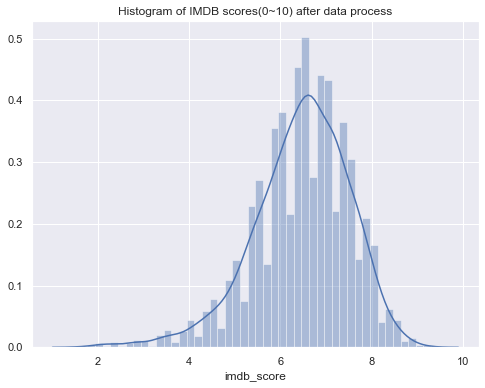

In [91]:
sns.set(rc={"figure.figsize": (8, 6)});
sns.distplot(df_raw2['imdb_score'])
plt.title('Histogram of IMDB scores(0~10) after data process')

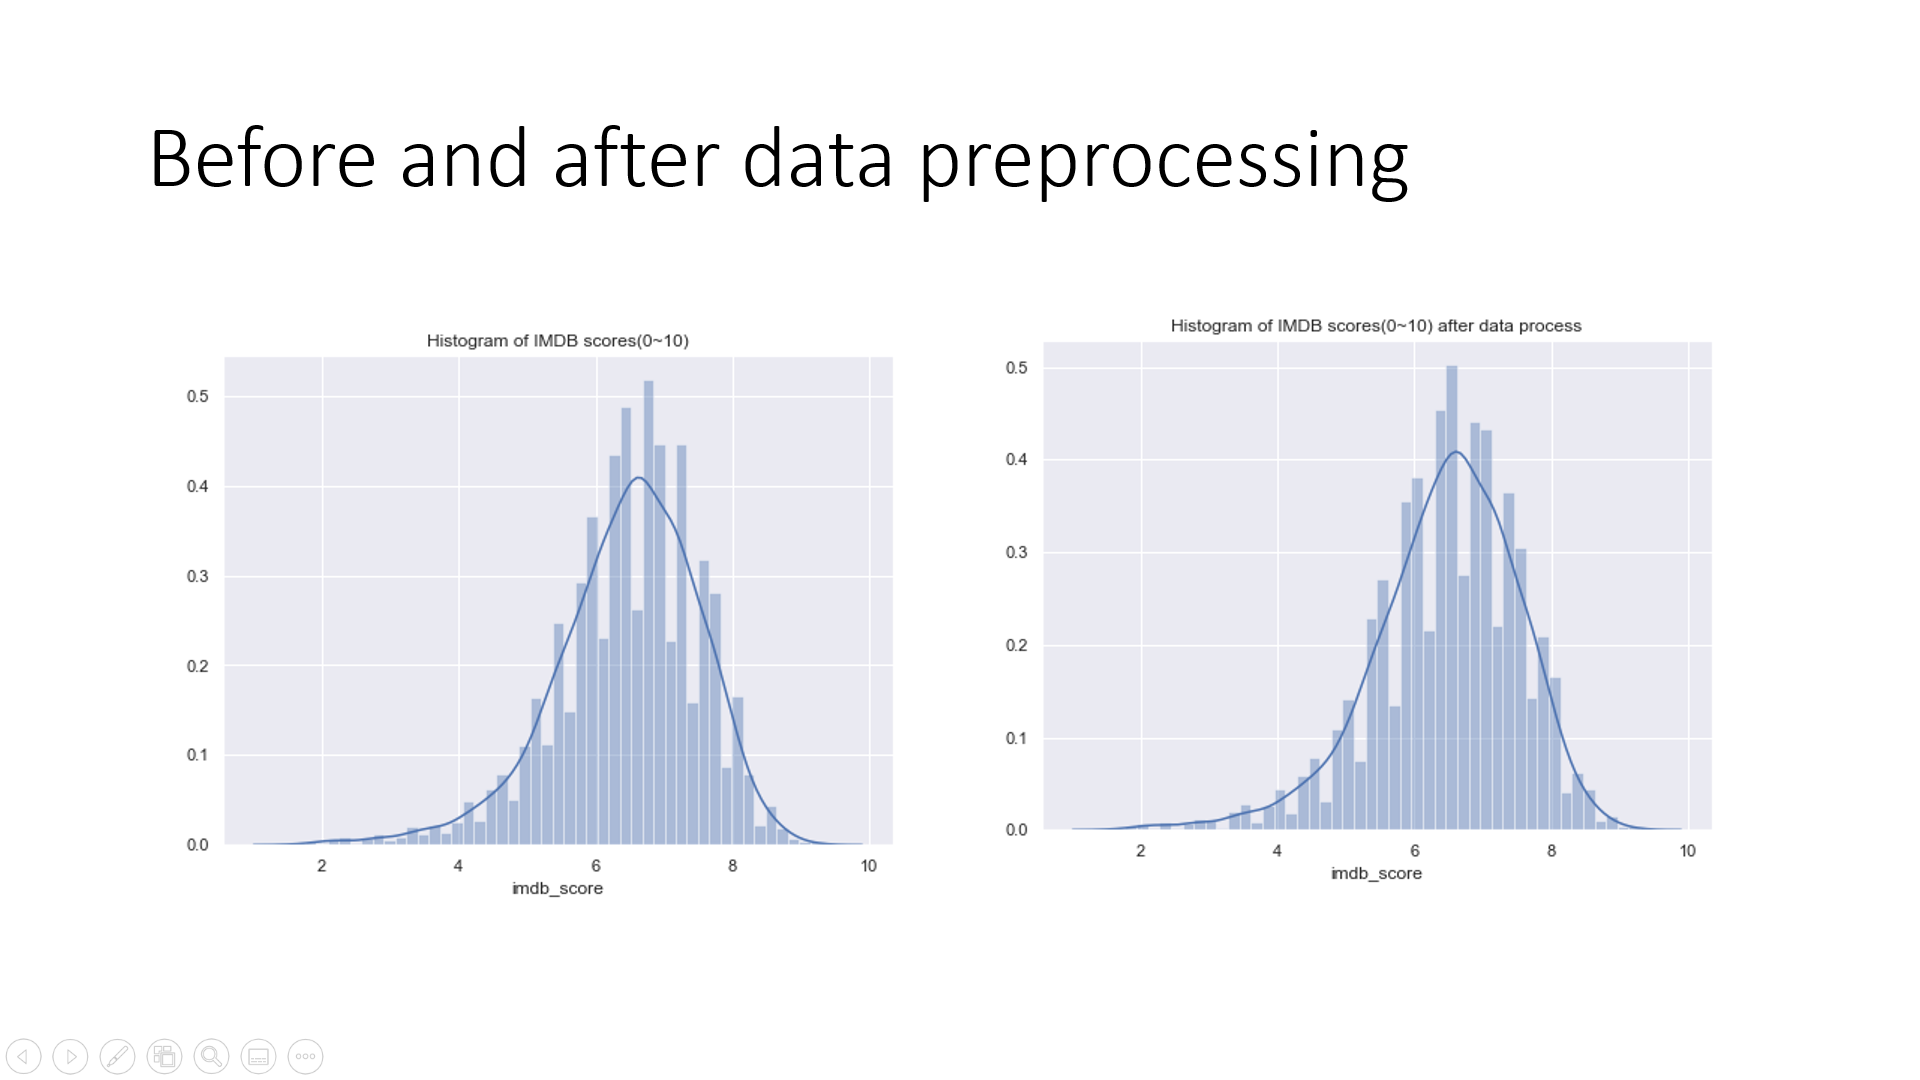

In [15]:
from IPython.display import Image
Image(filename='BeforeAfterProcessing.png')

#### The plot on the left is the raw data imdb_score distribution while the plot on the right is the imdb_score distribution after data preprocessing and feature engineering. As we can see from the plots above, distribution almost maintained after the processing which indicates the train and test data can represent the orginial data very well. 

<a id="XGBoost Baseline Model"></a>
## XGBoost Baseline Model

In [215]:
df_raw2= pd.read_csv('df_raw2_train.csv') #import train and validation dataset of 3203 data points
df_raw2.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,1.0,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,686.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,258.0,...,0,0,0,0,0,1,0,0,0,0
2,3.0,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,1339.0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,323.0,...,0,0,0,0,0,1,0,0,0,0
4,6.0,1398.0,392.0,156.0,0.0,4000.0,880.0,24000.0,336530303.0,554.0,...,0,0,0,0,0,1,0,0,0,0


In [216]:
df_raw2.shape

(3203, 673)

In [217]:
df_raw3=df_raw2
df_raw3.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name','director_name'], inplace=True)

In [218]:
df_imputed=df_raw3

In [219]:
df_imputed

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0,0,0,0,0,1,0,0,0,0
1,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,...,0,0,0,0,0,1,0,0,0,0
2,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0,0,0,0,0,1,0,0,0,0
3,462.0,132.0,475.0,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,...,0,0,0,0,0,1,0,0,0,0
4,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056.0,46055.0,0.0,1902.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,5.0,86.0,24.0,142.0,407.0,39552600.0,3411.0,1090.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
3199,95.0,97.0,8.0,22.0,423.0,17000000.0,3274.0,516.0,0.0,84.0,...,0,0,0,0,1,0,0,0,0,0
3200,154.0,89.0,310.0,587.0,22000.0,5739376.0,58260.0,24419.0,0.0,286.0,...,0,0,0,0,0,0,0,1,0,0
3201,20.0,120.0,3.0,234.0,984.0,3773863.0,4583.0,2563.0,1.0,55.0,...,0,0,0,0,0,1,0,0,0,0


In [220]:
useless_cols = ["id","imdb_score", 'actor_1_name','actor_2_name','actor_3_name','director_name']

In [221]:
train_cols = df_raw2.columns[~df_raw2.columns.isin(useless_cols)]
X_train = df_raw2[train_cols]
y_train = df_raw2["imdb_score"]

In [222]:
fake_valid_inds = np.random.choice(X_train.index.values, 600, replace = False)

train_inds = np.setdiff1d(X_train.index.values, fake_valid_inds)

In [226]:
import xgboost as xgb

In [223]:
#XGBOOST transform data into DMatrix format for modeling
dtrain = xgb.DMatrix(X_train.loc[train_inds], y_train.loc[train_inds])
dvalid = xgb.DMatrix(X_train.loc[fake_valid_inds],  y_train.loc[fake_valid_inds])
type(dtrain)

xgboost.core.DMatrix

In [224]:
X_train.shape

(3203, 667)

In [225]:
MAX_ROUNDS = 4000 #1000
EARLY_STOP = 500 #50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50
RANDOM_STATE = 2000

In [227]:

# XGBoost Parameters 2
params = {}
#params['objective'] = 'binary:logistic' #binary:hinge
#params['objective'] = 'multi:softmax'
params['objective'] = 'reg:linear'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'rmse'  #aucpr: Area under the PR curve
params['random_state'] = RANDOM_STATE


watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [228]:
%%time

#m_lgb = lgb.train(params, train_data, valid_sets = [fake_valid_data], verbose_eval=20) 

#xgb should use all data to train,should not exclude last 28 days ??

m_xgb = xgb.train(params,
                   dtrain,
                   MAX_ROUNDS,
                   watchlist,
                   early_stopping_rounds = EARLY_STOP,
                   maximize = True,
                   verbose_eval = VERBOSE_EVAL)

[0]	train-rmse:5.80615	valid-rmse:5.86225
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 500 rounds.
[50]	train-rmse:1.11343	valid-rmse:1.12072
[100]	train-rmse:0.72019	valid-rmse:0.72462
[150]	train-rmse:0.66693	valid-rmse:0.68424
[200]	train-rmse:0.63508	valid-rmse:0.66825
[250]	train-rmse:0.60920	valid-rmse:0.66212
[300]	train-rmse:0.58752	valid-rmse:0.65933
[350]	train-rmse:0.56872	valid-rmse:0.65688
[400]	train-rmse:0.55223	valid-rmse:0.65626
[450]	train-rmse:0.53666	valid-rmse:0.65533
[500]	train-rmse:0.52253	valid-rmse:0.65644
Stopping. Best iteration:
[0]	train-rmse:5.80615	valid-rmse:5.86225

Wall time: 38.1 s


In [229]:
useless_cols = ["id","imdb_score", 'actor_1_name','actor_2_name','actor_3_name','director_name'] 
# xgb does not take label encoded directly, need one hot encoded features. 
# so dropped 'actor_1_name','actor_2_name','actor_3_name','director_name'

train_cols = df_raw2.columns[~df_raw2.columns.isin(useless_cols)]

In [230]:
df_raw2_test=pd.read_csv('df_raw2_test.csv') #hold out dataset of 360


In [231]:
df_raw2_test.shape

(360, 673)

In [232]:
X_test=df_raw2_test[train_cols]
y_test=df_raw2_test["imdb_score"]


In [233]:
X_test.shape

(360, 667)

In [234]:
preds = m_xgb.predict(xgb.DMatrix(X_test))

In [235]:
import sklearn.metrics as metrics
import math
print('XGB - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test, preds)))
# XGB - test rmse:  0.7592219053252504
# XGB - test rmse:  0.7565894072382466

XGB - test rmse:  0.7565894072382466
